
## 👥 Autores

Este proyecto fue desarrollado por:

| Nombre Completo                     | Número de Identificación | Carrera Universitaria              |
| ----------------------------------- | -----------------------: | ---------------------------------- |
| **Yorladys Argumedo Lozano**        | `1038824209`            | Ingeniería Industrial Virtual      |
| **Sebastian Gabriel Castro**        | `1029720632`            | Ingeniería Industrial Virtual      |

---



In [5]:
# Importamos la librería de Google Colab para manejar archivos
from google.colab import files

# Instalamos la librería de Kaggle
!pip install kaggle --quiet

print("Por favor, sube el archivo 'kaggle.json' que descargaste de Kaggle:")
# Este comando abrirá una ventana para que selecciones el archivo desde tu PC
uploaded = files.upload()

Por favor, sube el archivo 'kaggle.json' que descargaste de Kaggle:


Saving kaggle.json to kaggle (1).json


In [6]:
# 1. Creamos la carpeta donde Kaggle espera encontrar las credenciales
!mkdir -p ~/.kaggle

# 2. Copiamos el archivo .json a esa carpeta
!cp kaggle.json ~/.kaggle/

# 3. Le damos los permisos de seguridad correctos al archivo
!chmod 600 ~/.kaggle/kaggle.json

print("¡API de Kaggle configurada!")

# 4. AHORA SÍ: Usamos la API para descargar los datos de la competencia
# Este comando le ordena a Colab que descargue los archivos por ti
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

print("\n¡Datos de la competencia descargados!")

# 5. Descomprimimos el archivo .zip que se acaba de descargar
!unzip -q -o udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

print("¡Archivos descomprimidos y listos para usar!")

¡API de Kaggle configurada!
  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 969MB/s]

¡Datos de la competencia descargados!
¡Archivos descomprimidos y listos para usar!


--- Análisis de la columna objetivo: 'RENDIMIENTO_GLOBAL' ---

Distribución de estudiantes por rendimiento:
RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


/tmp/ipython-input-1861186564.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=target_col, order=performance_counts.index, palette='viridis')


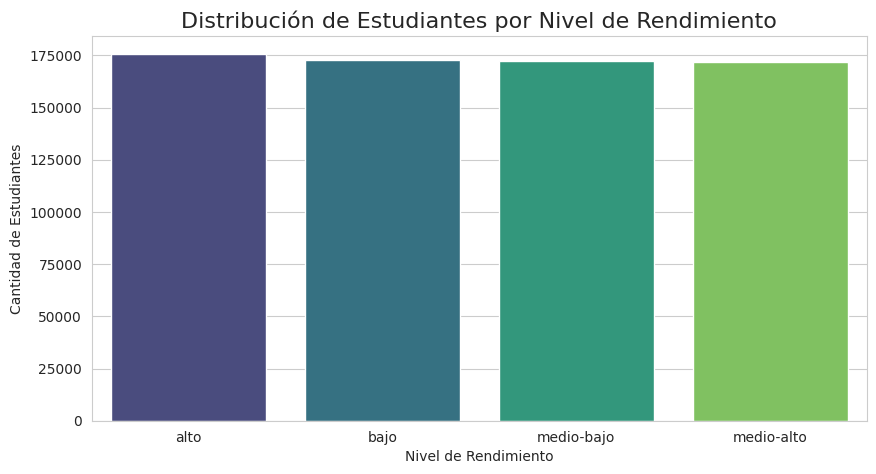


--- Explorando Factores Socio-Económicos ---


/tmp/ipython-input-1861186564.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='F_ESTRATOVIVIENDA', palette='plasma', order=train_df['F_ESTRATOVIVIENDA'].value_counts().index)


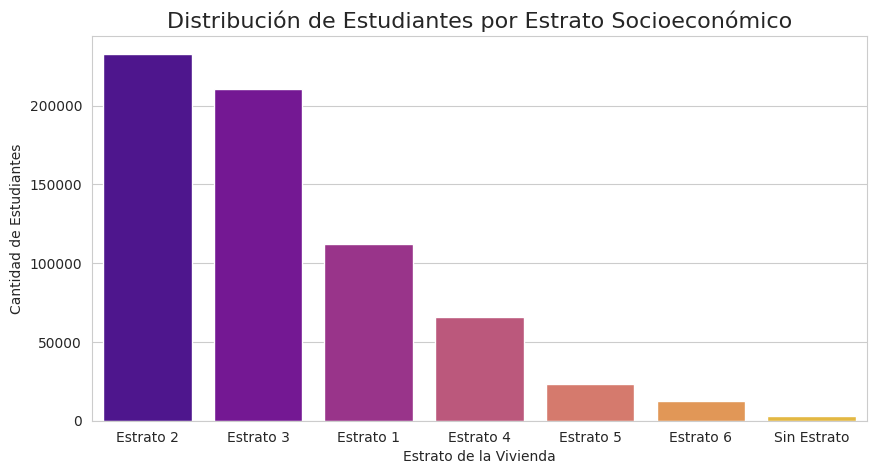


Acceso a Internet en el hogar:
F_TIENEINTERNET
Si    592514
No     73357
Name: count, dtype: int64

--- Explorando Indicadores Numéricos ---


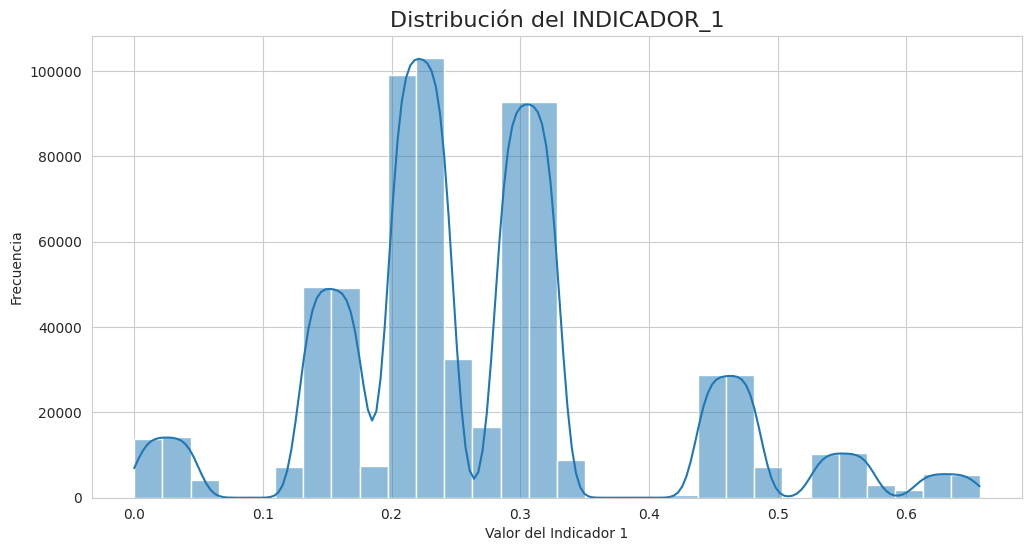


--- ¿Cómo se relacionan las características con el rendimiento? ---

Relación entre Estrato y Rendimiento:


RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
F_ESTRATOVIVIENDA,,,,
Estrato 1,14363,42388,23643,31597
Estrato 2,45948,63068,59536,64119
Estrato 3,59121,42756,56841,51967
Estrato 4,28624,9064,16154,11672
Estrato 5,12415,2731,5112,3350
Estrato 6,7648,1287,2314,1356
Sin Estrato,588,1436,579,686


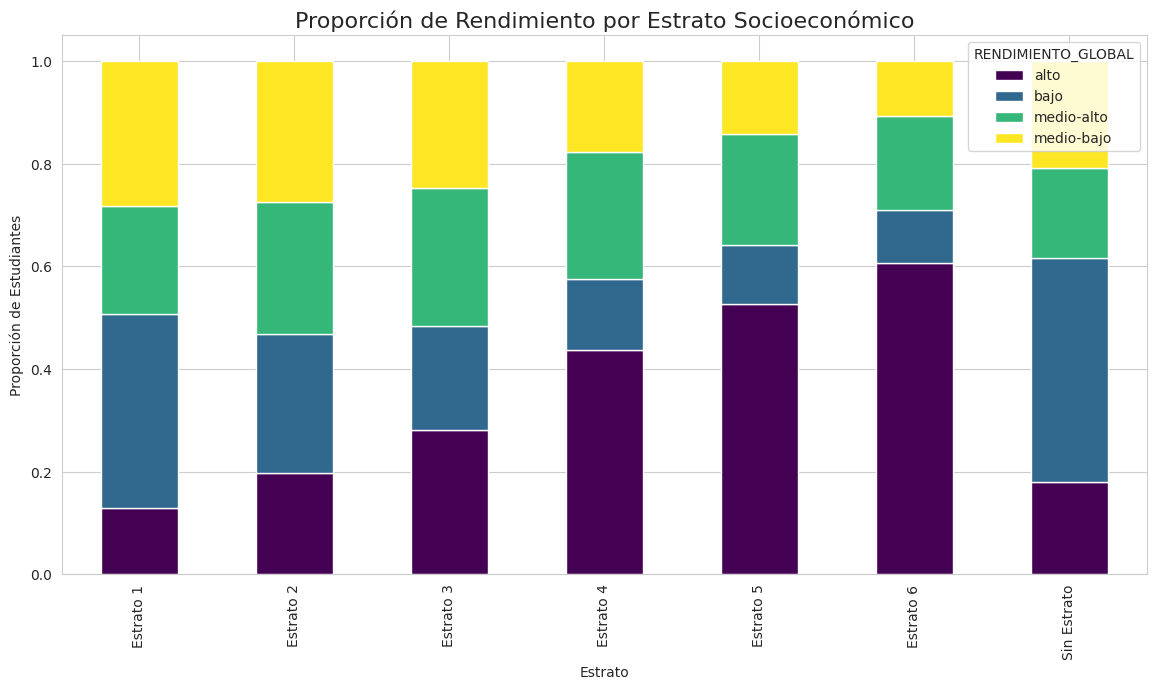

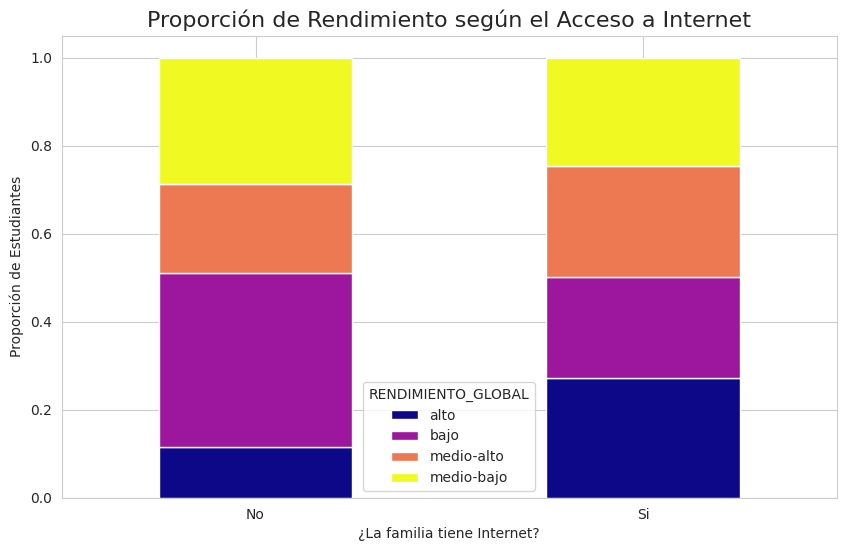

In [8]:
# ==============================================================================
# PASO 1: VISTAZO INICIAL (YA LO HICIMOS, PERO LO DEJAMOS PARA CONSISTENCIA)
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que se vean mejor los gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Asumimos que train_df ya está cargado como lo hiciste antes


# ==============================================================================
# PASO 2: ANÁLISIS DE LA VARIABLE OBJETIVO (CORREGIDO)
# ==============================================================================

# La columna objetivo en este dataset se llama 'RENDIMIENTO_GLOBAL'
target_col = 'RENDIMIENTO_GLOBAL'

print(f"--- Análisis de la columna objetivo: '{target_col}' ---")

# Contamos cuántos estudiantes hay en cada categoría
performance_counts = train_df[target_col].value_counts()
print("\nDistribución de estudiantes por rendimiento:")
print(performance_counts)

# Visualizamos esa distribución con un gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x=target_col, order=performance_counts.index, palette='viridis')
plt.title('Distribución de Estudiantes por Nivel de Rendimiento', fontsize=16)
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Nivel de Rendimiento')
plt.show()


# ==============================================================================
# PASO 3: EXPLORANDO LAS CARACTERÍSTICAS (CORREGIDO)
# ==============================================================================

# --- A. Factores Socio-Económicos ---
print("\n--- Explorando Factores Socio-Económicos ---")

# 1. Estrato (Usando el nombre correcto 'F_ESTRATOVIVIENDA')
# Notamos que la columna es de tipo 'object', pero la trataremos como categórica
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='F_ESTRATOVIVIENDA', palette='plasma', order=train_df['F_ESTRATOVIVIENDA'].value_counts().index)
plt.title('Distribución de Estudiantes por Estrato Socioeconómico', fontsize=16)
plt.xlabel('Estrato de la Vivienda')
plt.ylabel('Cantidad de Estudiantes')
plt.show()

# 2. Acceso a Internet (Usando el nombre correcto 'F_TIENEINTERNET')
print("\nAcceso a Internet en el hogar:")
print(train_df['F_TIENEINTERNET'].value_counts())


# --- B. Indicadores Numéricos ---
print("\n--- Explorando Indicadores Numéricos ---")

# 1. Distribución del INDICADOR_1 (Reemplazamos las horas de lectura por esta)
plt.figure(figsize=(12, 6))
sns.histplot(train_df['INDICADOR_1'], bins=30, kde=True)
plt.title('Distribución del INDICADOR_1', fontsize=16)
plt.xlabel('Valor del Indicador 1')
plt.ylabel('Frecuencia')
plt.show()


# ==============================================================================
# PASO 4: CONECTANDO LAS PISTAS (ANÁLISIS MÁS COMPLEJO - CORREGIDO)
# ==============================================================================

print("\n--- ¿Cómo se relacionan las características con el rendimiento? ---")

# Pregunta 1: ¿El estrato socioeconómico parece influir en el rendimiento?
# Usamos los nombres de columna correctos
estrato_performance = pd.crosstab(train_df['F_ESTRATOVIVIENDA'], train_df[target_col])
print("\nRelación entre Estrato y Rendimiento:")
display(estrato_performance)

# Visualizamos en porcentajes
estrato_performance.div(estrato_performance.sum(1).astype(float), axis=0).plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    colormap='viridis'
)
plt.title('Proporción de Rendimiento por Estrato Socioeconómico', fontsize=16)
plt.xlabel('Estrato')
plt.ylabel('Proporción de Estudiantes')
plt.show()


# Pregunta 2: ¿Tener internet en casa se relaciona con un mejor rendimiento?
# Usamos los nombres de columna correctos
internet_performance = pd.crosstab(train_df['F_TIENEINTERNET'], train_df[target_col])
internet_performance.div(internet_performance.sum(1).astype(float), axis=0).plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='plasma'
)
plt.title('Proporción de Rendimiento según el Acceso a Internet', fontsize=16)
plt.xlabel('¿La familia tiene Internet?')
plt.ylabel('Proporción de Estudiantes')
plt.xticks(rotation=0)
plt.show()